# ParallelConstantChannelPulseTemplate
One reoccuring problem is to add a constant channel to an already existing possibly complex pulse. The setting in this example requires us to put a trigger pulse before the example pulse written in [03FreeInductionDecayExample](03FreeInductionDecayExample.ipynb). Unfortunately, the trigger pulse has to be played on a seperate marker channel that is not included in the example pulse. Therefore, we will add this channel to the pulse with the constant value 0.

Let us start with loading the experiment and defining the trigger pulse

In [1]:
from qupulse.pulses import TablePT
from qupulse.serialization import FilesystemBackend, PulseStorage

pulse_storage = PulseStorage(FilesystemBackend('./serialized_pulses'))
free_induction_decay = pulse_storage['free_induction_decay']
print('Defined channels of loaded pulse:', free_induction_decay.defined_channels)

trig_pulse = TablePT({'RFX': [(0, 0), ('t_trig', 0)],
                      'RFY': [(0, 0), ('t_trig', 0)],
                      'Marker': [(0, 1), ('t_trig', 1)]})
print('Defined channels of trigger pulse:', trig_pulse.defined_channels)

Defined channels of loaded pulse: {'RFY', 'RFX'}
Defined channels of trigger pulse: {'RFY', 'RFX', 'Marker'}


If we now try to concatenate the pulses we get an error as they differ in their defined channels.

In [2]:
try:
    experiment = trig_pulse @ free_induction_decay
except ValueError as err:
    print(repr(err))

ValueError("The subtemplates are defined for different channels: defined {'RFY', 'RFX', 'Marker'} vs. subtemplate {'RFY', 'RFX'}")


We can now add an extra channel with a constant value to the `free_induction_decay` pulse. This allows us to concatenate the pulses.

In [3]:
from qupulse.pulses.multi_channel_pulse_template import ParallelConstantChannelPulseTemplate
extended_free_induction_decay = ParallelConstantChannelPulseTemplate(free_induction_decay, {'Marker': 0})

experiment = trig_pulse @ extended_free_induction_decay

Read example parameters from file and plot complete pulse

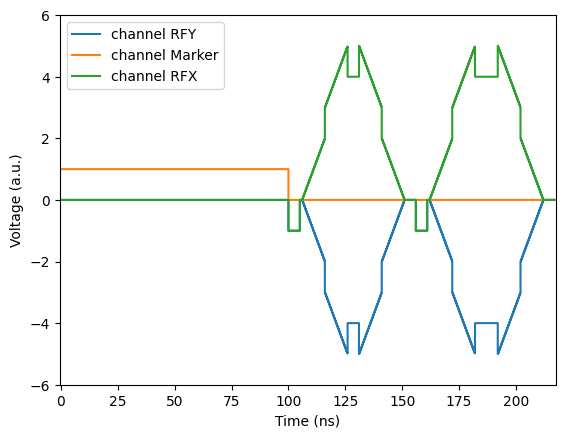

In [4]:
import json
from qupulse.pulses.plotting import plot

with open('parameters/free_induction_decay.json', 'r') as parameter_file:
    example_values = json.load(parameter_file)

_ = plot(experiment, {**example_values, 't_trig': 100, 'N_fid_steps': 2})